**The paper of the Dataset you can find it [here](https://arxiv.org/pdf/2005.06557)**

# **Data Fetching**

In [ ]:
# For using the data from the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Get the path for the drive folder
dialect_data_path = '/content/drive/MyDrive/Dialect_data'
data_path = '/content/drive/MyDrive/Dialect_data/data'
models_path = '/content/drive/MyDrive/Dialect_data/models'

# get the path for the file
db_file = data_path +'/dialects_database.db'

In [ ]:
# # Upload the data and get its path
# db_file = '/content/dialects_database.db'

In [ ]:
# Import sqlite3 and pandas
import sqlite3
import pandas as pd

In [ ]:
# connect to the database file
conn = sqlite3.connect(db_file)

# make two variable for the two tables
table1='id_text'
table2='id_dialect'

# execute a query to join the two tables on the 'id' column
query = f"""
SELECT {table1}.id, {table1}.text, {table2}.dialect
FROM {table1}
JOIN {table2} ON {table1}.id = {table2}.id
"""
raw_df = pd.read_sql_query(query, conn)

# close the database connection
conn.close()
pd.set_option('display.max_colwidth', 100000)
# display the result as a DataFrame
raw_df

,id,text,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو اختهم او قريبتهم تتعاكس تقولي عليهم من نشاط حقوق المرأة من ردة فعلهم.,LY
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ليا انا ميليشياوي زمان وتوة,LY
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها غير كل البنات وبيحس كأنه يعرفها من زمان. بعدين يتزوج وحدة منهن وممكن اثنين ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب\nand they live happily ever after\nذي اند,LY
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم هو انسان قليل الادب اصلاً. ثانياً شن ذنب يلي معندهش اب ولا ام ولا خوت ولا خوات؟ يعني اليتيمة متستحقش تتزوج؟ وثالثاً ليش البنت هي بس لازم ادير الف حساب للراجل؟ هي متستحقش يندارلها الف حساب ولا هي عبدة؟,LY
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ازوج بنت يتيمة ولا بنت معندهش خوت. هدي اعصابك وفكينا من التخلف امتاعك,LY
...,...,...,...
147720,982775354405376000,الناس دي بتنفخ في قربة مقدودة بالدارجي كده البلد دي لو ما الكيزان ديل راحو مافي حياه شريفه في البلد دي لان سبب الفساد والمصائب الموجودة #التطلع_لسودان_افضل,SD
147721,980728852224860160,@Wail_Hamza @amiromer انت عايش وين بره السودان ولا شنو ماشايف البحصل دا,SD
147722,975502734668500992,مااحرم نفسي ميسي حريف ولعاب برضو ..\nمدريدي وافتخر 🇪🇸,SD
147723,980207908641263616,ياخي ديل ماخلو للشيطان وإبليس شي لكن يروحو وين من ربنا ونحن وراك وراك ياكوز ياعفن الأيام معدوده خلاص #تعرف_علي_الكيزان,SD


In [ ]:
# save the raw dataset
raw_df.to_csv(data_path +'/raw_dataset.csv', index=False)

# **EDA**

In [ ]:
# raw_df = pd.read_csv(dataset_path + '/raw_dataset.csv', encoding='utf-8')

In [ ]:
# see the datafrem information
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147725 entries, 0 to 147724
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       147725 non-null  int64 
 1   text     147725 non-null  object
 2   dialect  147725 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


*   **Check NaNs**



In [ ]:
raw_df.isnull().sum()

id         0
text       0
dialect    0
dtype: int64



*   **Check duplicates**



In [ ]:
raw_df.duplicated("text").sum()

0

*   **Sampling**




In [ ]:
raw_df.sample(15)

,id,text,dialect
84107,1156630491656839168,@NaguibSawiris مش عاجبه كلام نجيب بيه !!\nيسكتله ؟!,EG
33564,962404454006968448,@AmY_E12 @AGhummied مافيش يهودي طلع من ليبيا لما لزوهم وخدي حتي قرش علي املاكه بس ممكن تكونوا انتو شاريين من يهودي قبل ما يلزوهم,LY
114665,1186625188093452288,باكبر الازمات ما تسكرت البنوك ، هلق مسكرين وساكتين ، الله اعلم شو عم يعملوا بالسر .,LB
27741,936996047586578432,@z4acHVLlpDGTYa0 واضح أسلوب رقي ليل بوكل انا ماني منشوفة بيش ننتحر ماننتحرش على حاجة فاضية,LY
137671,979226915394543616,@ZflTsZhBtHzOpcV @Midad_News موزة مين ي عرص ي مصري ي واطي الدخلك شنو هنا,SD
30484,693557159347539968,@osamaalfitory @LIBYANIYYA ههههههه الراس في بروحة والجثة خليني ساكت,LY
1054,1035476390341238784,السنين تجري ونصيب اولادي ذكريات الغربه والتهجير والخوف من الانذال اللي ابتلينا بيهم https://t.co/NJvVvB8i7x,LY
49600,1156982524339511296,هو حناني عليك قسّاك حتى عليا .. ولا رضايا كمان خلاك تلعب بيا.. \nولا تسامح روحي معاك غرّك بيا.. \nوغدرك بيا .. أثّر فيا.. \nواتغيّرت شوية شوية .. اتغيّرت ومش بإيديا\nوبديت أطوي حنيني إليك.. وأكره ضعفي وصبري عليك.. \nواخترت أبعد.. وعرفت أعند.. حتى الهجر قدرت عليه https://t.co/4yOWQEi31q,EG
40088,1061357735541911552,@e_oif المهم علقيها وصافي باش يخافو😂😂😂,MA
40296,402452995201581056,@R2hmah @chorita12 تبقى المغربية تاج راسك و المرآة المطلوبة من كل الجنسيات لحسن معاملتها و هي ربت بيت ممتازة و لدكآها و جمالها و اللي بدك,MA


*   **Check dataset balancing**

In [ ]:
value_counts=raw_df['dialect'].value_counts()
value_counts

dialect
EG    57636
LY    36499
LB    27617
SD    14434
MA    11539
Name: count, dtype: int64

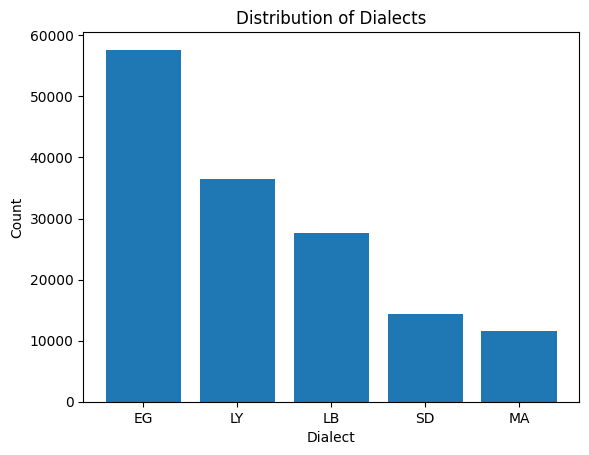

In [ ]:
# make a visualization
import matplotlib.pyplot as plt

# Create bar plot
plt.bar(value_counts.index, value_counts.values)
# Add title and labels
plt.title('Distribution of Dialects')
plt.xlabel('Dialect')
plt.ylabel('Count')

# Show plot
plt.show()

# **Data Preprocessing**

## **Helper functions**

In [ ]:
# Import nltk for Arabic stopwords
import nltk
from nltk.corpus import stopwords

# Download the stopwords
nltk.download('stopwords')
# Get the unique stopwords
stop_words = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

raw_text = " في نلعب هيا بنا"
preprocessed_text = remove_stopwords(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before:  في نلعب هيا بنا
After : نلعب


In [ ]:
# import regex
import re

In [ ]:
def remove_usernames(text):
    clean_text = re.sub(r'@\w+', '', text)
    return clean_text

raw_text = "@baDYHezsQfLVRtQ مسا مسا اهو انت 😂😂😂"
preprocessed_text = remove_usernames(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: @baDYHezsQfLVRtQ مسا مسا اهو انت 😂😂😂
After :  مسا مسا اهو انت 😂😂😂


In [ ]:
def remove_emojis(text):
    clean_text = re.sub(r'[^\w\s#@/:%.,_-]', '', text)
    return clean_text

raw_text = "@baDYHezsQfLVRtQ مسا مسا اهو انت 😂😂😂"
preprocessed_text = remove_emojis(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: @baDYHezsQfLVRtQ مسا مسا اهو انت 😂😂😂
After : @baDYHezsQfLVRtQ مسا مسا اهو انت 


In [ ]:
def remove_numbers(text):
    clean_text = re.sub(r'\d+', '', text)
    return clean_text

raw_text = "٣٣ هاي"
preprocessed_text = remove_numbers(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: ٣٣ هاي
After :  هاي


In [ ]:
def remove_links(text):
  URL_REGEXES = [
    r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)",
    r"@(https?|ftp)://(-\.)?([^\s/?\.#-]+\.?)+(/[^\s]*)?$@iS",
    r"http[s]?://[a-zA-Z0-9_\-./~\?=%&]+",
    r"www[a-zA-Z0-9_\-?=%&/.~]+",
    r"[a-zA-Z]+\.com",
    r"(?=http)[^\s]+",
    r"(?=www)[^\s]+",
    r"://",
  ]

  for reg in URL_REGEXES:
    text = re.sub(reg, '', text)
  return text

raw_text = "النكتة حلوة، بس هو مكانش عامل فولو ليه أصلا https://t.co/6lmlpseLk4	www.google.com"
preprocessed_text = remove_links(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: النكتة حلوة، بس هو مكانش عامل فولو ليه أصلا https://t.co/6lmlpseLk4	www.google.com
After : النكتة حلوة، بس هو مكانش عامل فولو ليه أصلا 	


In [ ]:
def remove_english(text):
    english_pattern = re.compile(r'[a-zA-Z]+')
    cleaned_text = re.sub(english_pattern, '', text)
    return cleaned_text

raw_text = "LeloSherif وانتي طيبة ي احلى لارا يا ملكة تويتر ❤️❤️\nيارب انا وانتي حبيبتي الله يسعدك ❤️❤️😘	"
preprocessed_text = remove_english(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: LeloSherif وانتي طيبة ي احلى لارا يا ملكة تويتر ❤️❤️
يارب انا وانتي حبيبتي الله يسعدك ❤️❤️😘	
After :  وانتي طيبة ي احلى لارا يا ملكة تويتر ❤️❤️
يارب انا وانتي حبيبتي الله يسعدك ❤️❤️😘	


In [ ]:
def remove_diacritics(text):
    arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                            ـ    | # Tatwil/Kashida
                         """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)

raw_text = "الــبسملة : ( بِسْمِ اللَّـهِ الرَّحْمَـٰنِ الرَّحِيمِ )"
preprocessed_text = remove_diacritics(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: الــبسملة : ( بِسْمِ اللَّـهِ الرَّحْمَـٰنِ الرَّحِيمِ )
After : البسملة : ( بسم الله الرحمٰن الرحيم )


In [ ]:
def normalize_chars(text):
    preprocessed_text = re.sub("[إأآا]", "ا", text)
    preprocessed_text = re.sub("ى", "ي", preprocessed_text)
    preprocessed_text = re.sub("ؤ", "ء", preprocessed_text)
    preprocessed_text = re.sub("ئ", "ء", preprocessed_text)
    preprocessed_text = re.sub("ة", "ه", preprocessed_text)
    preprocessed_text = re.sub("گ", "ك", preprocessed_text)
    preprocessed_text = re.sub("ڤ", "ف", preprocessed_text)
    preprocessed_text = re.sub("چ", "ج", preprocessed_text)
    preprocessed_text = re.sub("ژ", "ز", preprocessed_text)
    preprocessed_text = re.sub("پ", "ب", preprocessed_text)
    return preprocessed_text

raw_text = "ى آ ؤ ئ هيا"
preprocessed_text = normalize_chars(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: ى آ ؤ ئ هيا
After : ي ا ء ء هيا


In [ ]:
def remove_special_chars(text):
  '''
   The regular expression r'[^\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\d\s]+'
    matches any characters that are not in the specified range of
    Arabic Unicode characters (\u0600-\u06FF, \u0750-\u077F, and \u08A0-\u08FF),
    digits (\d), or whitespace (\s).
  '''
  special_chars_pattern = re.compile(r'[^\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\d# ]+')

  cleaned_text = re.sub(special_chars_pattern, ' ', text)
  return cleaned_text

raw_text = " مرحيا ðð·"
preprocessed_text = remove_special_chars(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before:  مرحيا ðð·
After :  مرحيا  


In [ ]:
def remove_punctuation(text):
  pun = r"([!\"#\$%\'\(\)\*\+,\.:;\-<=·>?@\[\\\]\^_ـ`{\|}~—٪’،؟`୍“؛”ۚ【»؛\s+«–…‘])"
  cleaned_text = re.sub(pun, ' ', text)
  return cleaned_text

# raw_text = "نسيت خبركم: طار #السبهان_هي"
raw_text = "   #تبيلس \n #الوكر_بيشجع_الفولورز\n #المواكيس_وفولورز_ببلاش\n#زعيم_تويتر_هيزودك"
preprocessed_text = remove_punctuation(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')


Before:    #تبيلس 
 #الوكر_بيشجع_الفولورز
 #المواكيس_وفولورز_ببلاش
#زعيم_تويتر_هيزودك
After :     تبيلس    الوكر بيشجع الفولورز   المواكيس وفولورز ببلاش  زعيم تويتر هيزودك


In [ ]:
def remove_extra_whitespaces(text):
    clean_text = re.sub(r'\s+', ' ', text)
    return clean_text.strip()

raw_text = "السلام عليكم    علـيـكم   "
preprocessed_text = remove_extra_whitespaces(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: السلام عليكم    علـيـكم   
After : السلام عليكم علـيـكم


In [ ]:
def remove_repeated_chars(text):
    pattern = re.compile(r"(.)\1{2,}")
    clean_text = pattern.sub(r"\1\1", text)
    return clean_text

raw_text = " اللللي بتااااااااااااااع  اللله اناااااااا "
preprocessed_text = remove_repeated_chars(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before:  اللللي بتااااااااااااااع  اللله اناااااااا 
After :  اللي بتااع  الله اناا 


## **Apply Preprocessing steps:**

1. stop words 'include tashkeel and diacritics'

2. emojis 'before numbers', numbers, usernames : 'independent'

3. urls : 'dependent on english chars


4. english words, remove_diacritics, tashkeel

5. remove_special_chars, punctuation

6. whitespaces -> last thing

In [ ]:
def remove_all(text):

  #stop_words
  text = remove_stopwords(text)

  #user_names
  text = remove_usernames(text)

  #emojies
  text = remove_emojis(text)

  #numbers
  text = remove_numbers(text)

  #links
  text = remove_links(text)

  # English
  text= remove_english(text)

  #tashkel
  text=remove_diacritics(text)

  #normalizeChars
  text=normalize_chars(text)

  # special chars
  text=remove_special_chars(text)

  # punctuation
  text=remove_punctuation(text)

  #white_space
  text = remove_extra_whitespaces(text)

  #repeated charachters
  text = remove_repeated_chars(text)

  return text

In [ ]:
# Make a copy from the dataframe
df = raw_df.copy()

# Drop the id column
df = df.drop('id',axis=1)

In [ ]:
# Apply the preprocessing on all the text in the dataset
df['text'] = df['text'].apply(remove_all)

In [ ]:
# see a sample from the processed dataframe
df.sample(50)

,text,dialect
113248,ناقص فارس سعيد وجيري ماهر وال قطيش,LB
99542,يعني ايه معرفش انام ليله كامله علشان كلمه ماخدتيش بالك حتي انها زعلتني منا صحتي علي ادي مش هقدر انا,EG
101587,اهي دي ممكن تكون احسن الاولي,EG
123755,يمكن حدا فارقه معو حضرتك,LB
30468,ربي يحفظك ويرجعك سالم غانم وياريت تكفيح شدوق للجماعه كلهم,LY
52413,الانانيه وحب التملك بيزيد,EG
47206,وااعع ميي الوداد دات البطوله,MA
94069,التاني سعيد حساسين عنده بلاوي كمان,EG
107844,ريتويت هون بدولار اللايك ب لبناني هاتوا لنشوف بلشنا,LB
2048,مافي هيك تصريح قصي ماحكا المسلسل ولسا مابلش تصوير كمان مو بلبنان هلي,LY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147725 entries, 0 to 147724
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     147725 non-null  object
 1   dialect  147725 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [ ]:
df.isnull().sum()

text       0
dialect    0
dtype: int64

In [ ]:
df.duplicated("text").sum()

146

In [ ]:
df = df.drop_duplicates(subset="text")

In [ ]:
df.duplicated("text").sum()

0

In [ ]:
# save the processed dataset
df.to_csv(data_path + '/processed_dataset.csv', index=False)

## **Encoding**

In [ ]:
# Get unique words
unique_words = set()
for sentence in df["text"]:
    words = sentence.split()
    unique_words.update(words)

# Convert set to list and append "ENDPAD"
unique_words = list(unique_words)

unique_words.append("ENDPAD")
num_words = len(unique_words)

In [ ]:
# see the number of the unique words
num_words

214599

In [ ]:
# get the unique dialects
dialects = list(set(df["dialect"].values))
num_dialects = len(dialects)

In [ ]:
# see the number
num_dialects

5

### Define Mappings between Sentences and Tags

In [ ]:
# create a dictionary for unique words with an index
word2idx = {w: i + 1 for i, w in enumerate(unique_words)}

# create a dictionary for unique dialects with an index
dialect2idx = {d: i for i, d in enumerate(dialects)}

In [ ]:
# Replace dialect labels with their index values
df["dialect"] = df["dialect"].map(dialect2idx)

In [ ]:
# see the dialects dictionary
dialect2idx

{'LB': 0, 'MA': 1, 'LY': 2, 'SD': 3, 'EG': 4}

In [ ]:
# see the dataframe
df

,text,dialect
0,قليلين ادب ومنافقين اختهم او قريبتهم تتعاكس تقولي عليهم نشاط حقوق المراه رده فعلهم,2
1,الليبيين متقلبين بالنسبه ليا انا ميليشياوي زمان وتوه,2
2,تانيه شاب ليبي بيرتاح لبنت مختلفه ويلاحظ انها البنات وبيحس كانه يعرفها زمان بعدين يتزوج وحده منهن وممكن ولاثلاثه وتنقلب الرومانسيه لعياط وشياط وتهزيب اند,2
3,رانيا عقليتك متخلفه اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم انسان قليل الادب اصلا ثانيا شن ذنب يلي معندهش اب ام خوت خوات يعني اليتيمه متستحقش تتزوج وثالثا ليش البنت لازم ادير الف حساب للراجل متستحقش يندارلها الف حساب عبده,2
4,شكلك متعقده علشان الراجل تحبيه ازوج بنت يتيمه بنت معندهش خوت هدي اعصابك وفكينا التخلف امتاعك,2
...,...,...
147720,الناس دي بتنفخ قربه مقدوده بالدارجي كده البلد دي الكيزان ديل راحو مافي حياه شريفه البلد دي لان سبب الفساد والمصاءب الموجوده التطلع لسودان افضل,0
147721,انت عايش وين بره السودان شنو ماشايف البحصل دا,0
147722,مااحرم نفسي ميسي حريف ولعاب برضو مدريدي وافتخر,0
147723,ياخي ديل ماخلو للشيطان وابليس شي يروحو وين ربنا ونحن وراك وراك ياكوز ياعفن الايام معدوده خلاص تعرف علي الكيزان,0


In [ ]:
# save the processed encoded dataset
df.to_csv(data_path + '/processed_encoded_dataset.csv', index=False)

In [ ]:
# save the dialects dictionary
import joblib

joblib.dump(dialect2idx, data_path + '/dialect2idx.joblib', compress=9)

['/content/drive/MyDrive/Dialect_data/data/dialect2idx.joblib']

# **Model Training**

## **Machine Learning**

In [ ]:
# Assigning the features and lables from the dataframe
features = df.text.values.astype(str)
lables = df.dialect.values.astype('int')

### **Spliting data**

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# split the dataset to train and test sets
X_train, X_test, y_train, y_test = train_test_split(
        features, lables, random_state=42, test_size=0.2, shuffle=True)

### **Apply TF-IDF**

In [ ]:
# import TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(
    min_df=0.001,
    max_df=0.95,
    ngram_range=(1, 2),
    max_features= 2000,
    analyzer='word')

### **Random Forest**

In [ ]:
# import Random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a RandomForestClassifier object
rf_clf = RandomForestClassifier(criterion='gini',
                                n_estimators=15,
                                min_samples_split=10,
                                min_samples_leaf=1,
                                max_features='auto',
                                random_state=42,
                                n_jobs=-1,
                                verbose=1)

In [ ]:
# Import the pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# build the pipeline
pipe_rf = Pipeline([('tfidf', tfidf_vectorizer),
                  ('clf', rf_clf)], verbose=True)

# start the training
pipe_rf.fit(X_train, y_train)

[Pipeline] ............. (step 1 of 2) Processing tfidf, total=  27.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


[Pipeline] ............... (step 2 of 2) Processing clf, total=  26.4s


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   26.4s finished


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, max_features=2000, min_df=0.0001,
                                 ngram_range=(1, 4))),
                ('clf',
                 RandomForestClassifier(max_features='auto',
                                        min_samples_split=10, n_estimators=15,
                                        n_jobs=-1, random_state=1,
                                        verbose=1))],
         verbose=True)

In [ ]:
# Import the metrics to evalute the model
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Test the model
y_pred_rf = pipe_rf.predict(X_test)
# Evaluating the model
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred_rf) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, y_pred_rf)}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Test Set Accuracy: 70.08630902013877 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.74      0.48      0.58      2283
           1       0.73      0.84      0.78     11484
           2       0.74      0.70      0.72      5578
           3       0.61      0.68      0.64      7268
           4       0.70      0.39      0.50      2932

    accuracy                           0.70     29545
   macro avg       0.71      0.62      0.65     29545
weighted avg       0.70      0.70      0.69     29545



[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.9s finished


In [ ]:
# import pickle to save the model
import pickle

In [ ]:
# Saving ML Model
with open(models_path + '/RF_model.pkl', 'wb') as file:
    pickle.dump(y_pred_rf, file)

## Deep Learning
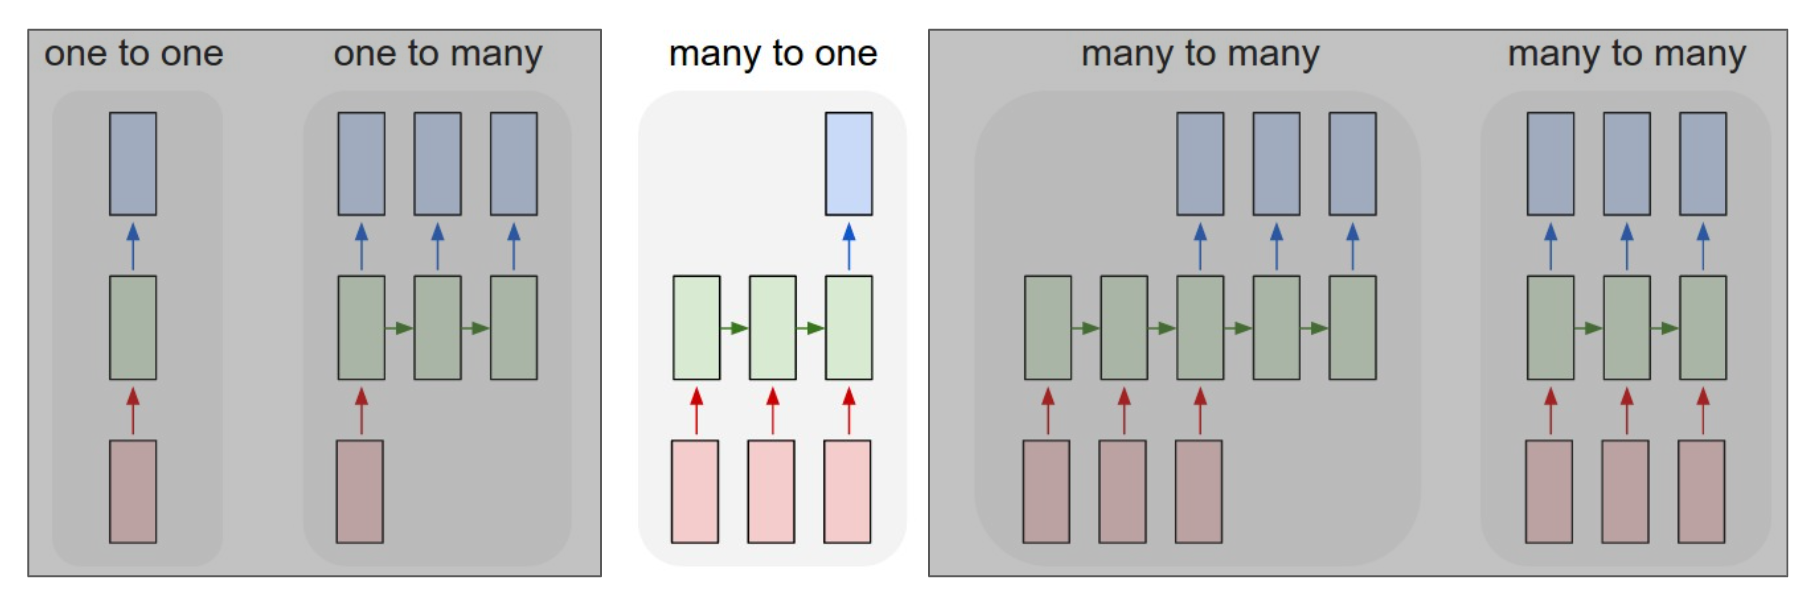

## **Fasttext**

In [ ]:
# load the processed data
df = pd.read_csv(data_path + '/processed_dataset.csv')

In [ ]:
# see the dataframe
df

,text,dialect
0,قليلين ادب ومنافقين اختهم او قريبتهم تتعاكس تقولي عليهم نشاط حقوق المراه رده فعلهم,LY
1,الليبيين متقلبين بالنسبه ليا انا ميليشياوي زمان وتوه,LY
2,تانيه شاب ليبي بيرتاح لبنت مختلفه ويلاحظ انها البنات وبيحس كانه يعرفها زمان بعدين يتزوج وحده منهن وممكن ولاثلاثه وتنقلب الرومانسيه لعياط وشياط وتهزيب اند,LY
3,رانيا عقليتك متخلفه اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم انسان قليل الادب اصلا ثانيا شن ذنب يلي معندهش اب ام خوت خوات يعني اليتيمه متستحقش تتزوج وثالثا ليش البنت لازم ادير الف حساب للراجل متستحقش يندارلها الف حساب عبده,LY
4,شكلك متعقده علشان الراجل تحبيه ازوج بنت يتيمه بنت معندهش خوت هدي اعصابك وفكينا التخلف امتاعك,LY
...,...,...
147574,الناس دي بتنفخ قربه مقدوده بالدارجي كده البلد دي الكيزان ديل راحو مافي حياه شريفه البلد دي لان سبب الفساد والمصاءب الموجوده التطلع لسودان افضل,SD
147575,انت عايش وين بره السودان شنو ماشايف البحصل دا,SD
147576,مااحرم نفسي ميسي حريف ولعاب برضو مدريدي وافتخر,SD
147577,ياخي ديل ماخلو للشيطان وابليس شي يروحو وين ربنا ونحن وراك وراك ياكوز ياعفن الايام معدوده خلاص تعرف علي الكيزان,SD


### splitting the data

In [ ]:
# Split the data into train, validation, and test (80:10:10)
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['dialect'], random_state=42)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['dialect'], random_state=42)

In [ ]:
# see any split
train_df

,text,dialect
85881,عيال بهاءم عاوزين مصحه نفسيه,EG
21153,اغلب جيل السبعينات كانو ضحيه لهذا القرار ربي يرحمك يسامحك ليش هكي بس ليش,LY
105869,حبيبه قلبي جوا جوا جوا رفيقتي وقمري ويا حلوه ايار الشهر اللي منشترك عيدنا وانتي معي وبخير وبصحه وسعاده يارب بحبك,LB
65966,وبعدين اهو معاكي صحاب حلوين اهو اينعم زملكاويه يلا معلش اهي صاحبتك برضو,EG
78102,فخور بيها جدا ربنا يحميها,EG
...,...,...
119830,معك حق بقي شي يرجع متل الاول,LB
119468,رب بلاش الزبون البلا نون بلااش الرزقه حلوه الناس الوحشه دي مش حلوه,LB
139074,بتزهج بالمراسيل شنو,SD
54271,ماشاء الله صفات شخصياتكم جميله قولولي جاوبتوا ازاي عشان اجاوب زيكم وابقي بطله انا كمان,EG


In [ ]:
#Method to convert csv to text file, specifically in fastText format.
def convert_csv_to_text(df,text_column, is_supervised= True, label_column = None, path=None, name=None):
  '''
  convert a dataframe mainly containg two columns(processed_text, and labeling) if training is supervised
  '''
  if is_supervised and label_column != None:
    #supervised training
    df['fasttext_data'] = '__label__' + df[label_column].astype(str) + ' '  + df[text_column]
    if path != None and name != None:
      with open(f'{path}/{name}_data.txt','w',encoding = 'utf-8') as f:
        f.writelines("\n".join('__label__' + df[label_column].astype(str) + ' '  + df[text_column].astype(str)))

In [ ]:
# create a path for the procssed files
fasttext_processed_data_path = '/content/drive/MyDrive/Dialect_data/data/fasttext_data'

In [ ]:
# apply the function to all splits
%%time
convert_csv_to_text(train_df, "text", True, "dialect", fasttext_processed_data_path, "train")
convert_csv_to_text(valid_df, "text", True, "dialect", fasttext_processed_data_path, "valid")
convert_csv_to_text(test_df, "text", True, "dialect", fasttext_processed_data_path, "test")

CPU times: user 3.69 s, sys: 159 ms, total: 3.85 s
Wall time: 4.37 s


### Training fastText classifier

In [ ]:
# install fasttext
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246768 sha256=4fac0a61567144c709113651b10a3909027db08fa5a044a7aec72ba151abc862
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
import fasttext

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import operator
import numpy as np

def get_report(model, is_dataframe=True, text_file=None,df=None,text_column=None, label_column=None):
    '''
    Method to calculate the classification report of fastText classifier
    Two modes:
        1- Dataframe mode, calculate using dataframe given two columns(text, and labels).
        2- Textfile mode, calculate using textfile(fastText format) given the text file of the data.
    '''
    if is_dataframe:
        text = df[text_column].values.tolist()
        truth = df[label_column].values.tolist()
        predicted = []
        for sent in text:
            pred = model.predict(sent)
            predicted.append(pred[0][0].split("__")[2])
        print("Classification Report: ")
        print(classification_report(truth, predicted))

    elif is_dataframe == False and text_file:
        file = open(text_file,"r")
        truth = []
        predicted = []
        for line in file:
            l1 = ' '.join(line.split(" ")[1:])
            truth.append(line.split(" ")[0].split("__")[-1])
            pred = model.predict(l1.replace("\n",""))
            predicted.append(pred[0][0].split("__")[2])
        print(set(truth) - set(predicted),"Sanity check")
        print("Classification Report: ")
        print(classification_report(truth, predicted))
    else:
        print("Errror")

In [ ]:
# put Hyperparamters
epochs = 5
wordNgrams = 2
dim = 100
with_emb = 'No'

In [ ]:
# train the model on the train file
model = fasttext.train_supervised(input = f'{fasttext_processed_data_path}/train_data.txt',
                            dim = dim, wordNgrams = wordNgrams, epoch=epochs, lr=0.1, minn=0, maxn=0, minCount = 1, thread = 8)

In [ ]:
# see the metrics on validation
%%time
model.test_label(f'{fasttext_processed_data_path}/valid_data.txt')

CPU times: user 207 ms, sys: 5.84 ms, total: 212 ms
Wall time: 482 ms


{'__label__MA': {'precision': 0.8244444444444444,
  'recall': 0.6440972222222222,
  'f1score': 0.723196881091618},
 '__label__SD': {'precision': 0.7854671280276817,
  'recall': 0.6305555555555555,
  'f1score': 0.699537750385208},
 '__label__LB': {'precision': 0.8644194756554308,
  'recall': 0.836231884057971,
  'f1score': 0.8500920810313075},
 '__label__LY': {'precision': 0.7762273901808786,
  'recall': 0.8234649122807017,
  'f1score': 0.7991487097632349},
 '__label__EG': {'precision': 0.8481012658227848,
  'recall': 0.9076068079194165,
  'f1score': 0.8768456375838927}}

In [ ]:
# save the model
model.save_model(models_path+'/fasttext_model.bin')

In [ ]:
#Load the model
loadded_simple = fasttext.load_model(models_path+'/fasttext_model.bin')

In [ ]:
# Evaluate the model on the test file
%%time
#Textfile mode
get_report(loadded_simple, is_dataframe=False, text_file=f'{fasttext_processed_data_path}/test_data.txt')

set() Sanity check
Classification Report: 
              precision    recall  f1-score   support

          EG       0.85      0.90      0.88      2880
          LB       0.86      0.85      0.85      1380
          LY       0.78      0.83      0.81      1823
          MA       0.84      0.70      0.77       577
          SD       0.78      0.60      0.68       719

    accuracy                           0.83      7379
   macro avg       0.82      0.78      0.80      7379
weighted avg       0.83      0.83      0.83      7379

CPU times: user 308 ms, sys: 1.22 ms, total: 309 ms
Wall time: 312 ms


## **RNN**

In [ ]:
# Convert 'text' and 'dialect' columns to lists
sentences = df["text"].tolist()
labels = df["dialect"].tolist()

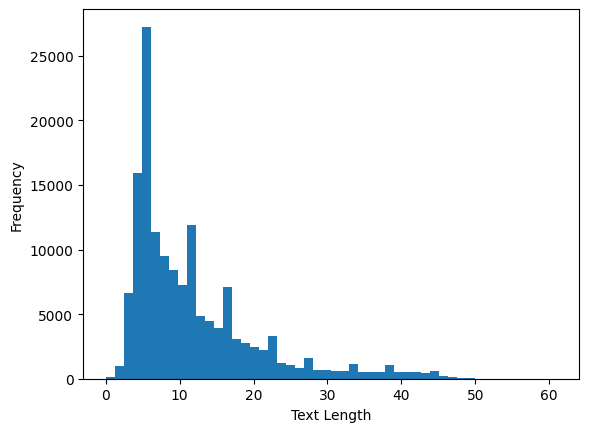

In [ ]:
# Visualize the distribution of text length
plt.hist([len(s.split()) for s in sentences], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Encode all words in each sentence with their index
X = [[word2idx[w] for w in s.split()] for s in sentences]

In [ ]:
# import numpy, tensorflow and pad_sequences
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# determine the maximum length
max_len = 50

# Pad the sequences
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

# Convert labels to numpy array (optional)
y = np.array(labels)

In [ ]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# import the layers you need
from tensorflow.keras.layers import LSTM, Embedding, Dense

In [ ]:
# build the arctiture of the model
RNN_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 64, input_length=max_len),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])

In [ ]:
# get a summary
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            13734336  
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 13771845 (52.54 MB)
Trainable params: 13771845 (52.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile the model
RNN_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['categorical_accuracy'])

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

In [ ]:
class_weights = compute_sample_weight(class_weight='balanced', y=y_train)
class_weights = dict(enumerate(np.squeeze(class_weights)))

In [ ]:
!pip install livelossplot

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

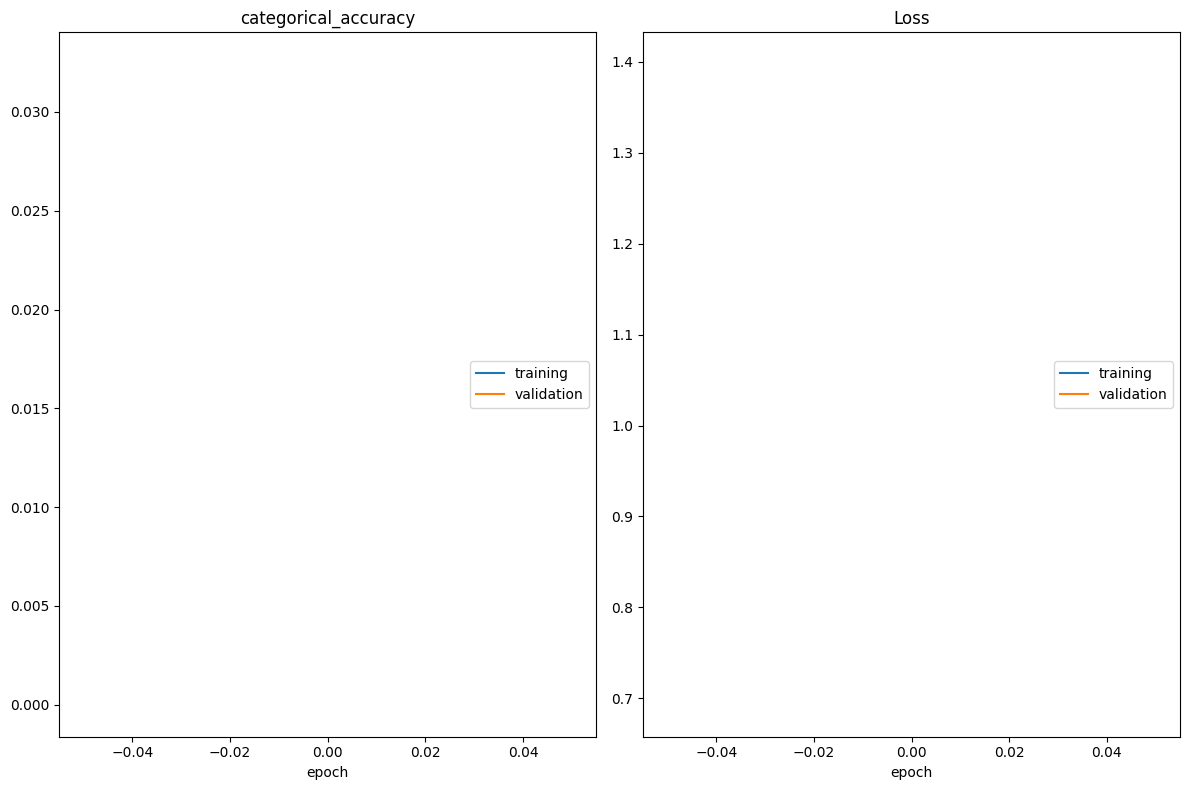

categorical_accuracy
	training         	 (min:    0.032, max:    0.032, cur:    0.032)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    0.693, max:    0.693, cur:    0.693)
	validation       	 (min:    1.397, max:    1.397, cur:    1.397)

Epoch 1: val_loss improved from inf to 1.39737, saving model to model_weights.h5


1847/1847 [==============================] - 770s 416ms/step - loss: 0.6929 - categorical_accuracy: 0.0324 - val_loss: 1.3974 - val_categorical_accuracy: 0.0000e+00
CPU times: user 8min 32s, sys: 10min 34s, total: 19min 7s
Wall time: 12min 50s


In [ ]:
%%time

chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history = RNN_model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test,y_test),
    batch_size=64,
    epochs=1,
    callbacks=callbacks,
    verbose=1,
    class_weight=class_weights
)

In [ ]:
# make prediction on test data
pred_rnn = RNN_model.predict(x_test)

924/924 [==============================] - 11s 11ms/step


In [ ]:
# see the first prdiction
print(pred_rnn[0])

[0.2443377  0.09949291 0.12778942 0.21417767 0.31420234]


In [ ]:
x_test.shape
y_test.shape
pred_rnn.shape

(29545, 50)

In [ ]:
# get the porbalities from the prdiction
pred_labels = np.argmax(pred_rnn, axis=1)

In [ ]:
# get a classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7268
           1       0.00      0.00      0.00      2283
           2       0.00      0.00      0.00      2932
           3       0.00      0.00      0.00      5578
           4       0.39      1.00      0.56     11484

    accuracy                           0.39     29545
   macro avg       0.08      0.20      0.11     29545
weighted avg       0.15      0.39      0.22     29545



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Save model to drive
RNN_model.save(models_path +'/LSTM_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Transformers**

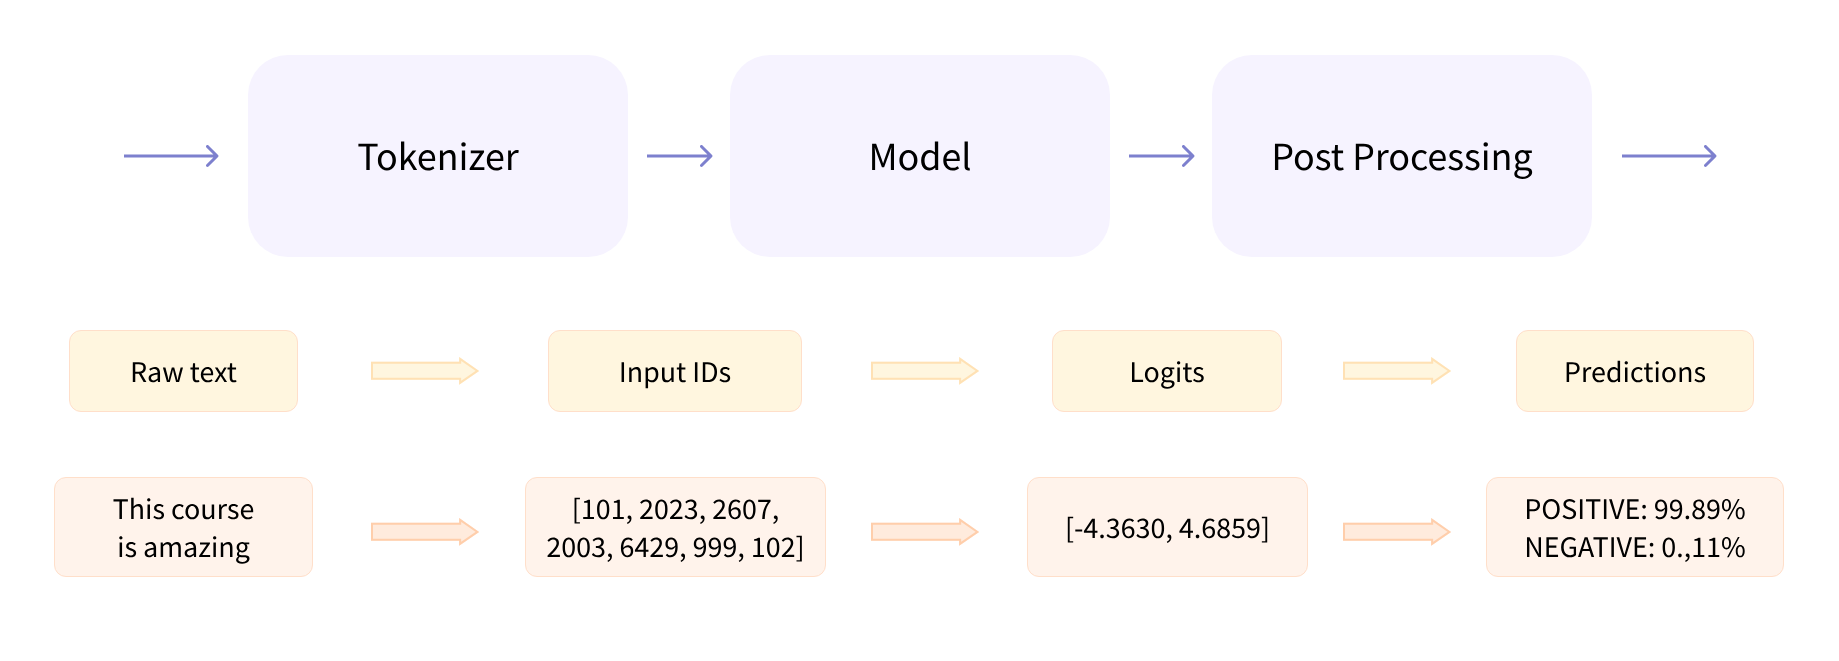

In [ ]:
#! pip install transformers
#! pip install datasets
#! pip install scipy sklearn
#! pip install huggingface_hub

In [ ]:
# from huggingface_hub import notebook_login

# notebook_login()

In [ ]:
# !apt install git-lfs
# !git config --global user.email "you@example.com"
# !git config --global user.name "Your Name"

In [ ]:
import transformers

print(transformers.__version__)

4.42.4


### **Loading the dataset**

In [ ]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requi

In [ ]:
from datasets import load_dataset

dataset = load_dataset('csv', data_files={'data': data_path + '/processed_encoded_dataset.csv'})

Generating data split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    data: Dataset({
        features: ['text', 'dialect'],
        num_rows: 147579
    })
})

In [ ]:
# Rename columns
dataset = dataset.rename_column('dialect', 'label')

In [ ]:
dataset

DatasetDict({
    data: Dataset({
        features: ['text', 'label'],
        num_rows: 147579
    })
})

### **Splitting the dataset**

In [ ]:
# Split the dataset into train and test sets
train_test_split = dataset['data'].train_test_split(test_size=0.1)
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']

# Further split the train set into train and validation sets
train_val_split = train_dataset.train_test_split(test_size=0.2)
train_dataset = train_val_split['train']
val_dataset = train_val_split['test']

In [ ]:
# show any split
train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 106256
})

In [ ]:
# show a smple of any split
train_dataset[0]

{'text': 'مين فكرك حبيبي ومين الهداك اليه صحيح القلب للقلب دليل', 'label': 1}

### Preprocessing the data (Tokenization)

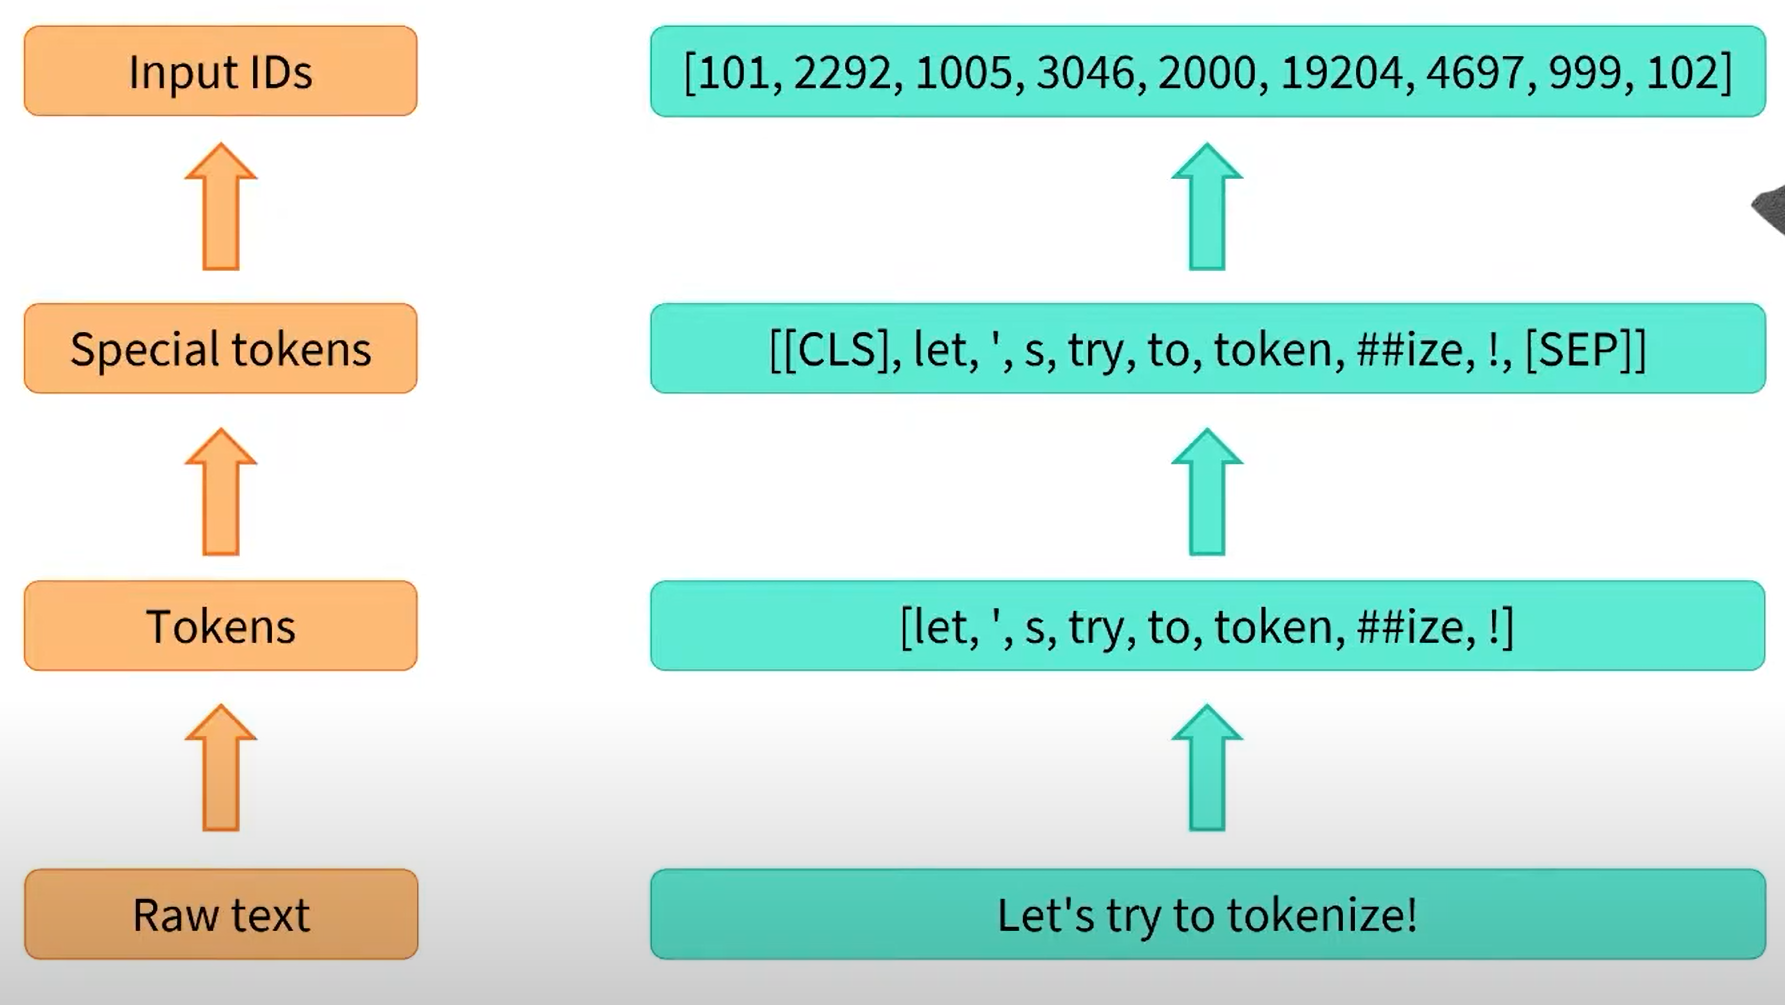

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = 'lafifi-24/arabicBert_arabic_dialect_identification'

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, max_length=64)

In [ ]:
tokenizer("ايه الاخبار عامل ايه")

{'input_ids': [2, 8108, 3052, 7484, 8108, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
def tokenize_function(batch):
    # Ensure all texts are strings (this step is critical if any non-string data might be present)
    texts = [str(text) for text in batch['text']]
    return tokenizer(texts, padding="max_length", truncation=True, max_length=64)

In [ ]:
# Apply the function to the dataset

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_val_dataset = val_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/106256 [00:00<?, ? examples/s]

Map:   0%|          | 0/26565 [00:00<?, ? examples/s]

Map:   0%|          | 0/14758 [00:00<?, ? examples/s]

### **Model Defining**

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("lafifi-24/arabicBert_arabic_dialect_identification", num_labels=5, ignore_mismatched_sizes=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at lafifi-24/arabicBert_arabic_dialect_identification and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([19, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([19]) in the checkpoint and torch.Size([5]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    """
    Computes accuracy, F1, precision, and recall for a given set of predictions.

    Args:
        pred (obj): An object containing label_ids and predictions attributes.
            - label_ids (array-like): A 1D array of true class labels.
            - predictions (array-like): A 2D array where each row represents
              an observation, and each column represents the probability of
              that observation belonging to a certain class.

    Returns:
        dict: A dictionary containing the following metrics:
            - Accuracy (float): The proportion of correctly classified instances.
            - F1 (float): The macro F1 score, which is the harmonic mean of precision
              and recall. Macro averaging calculates the metric independently for
              each class and then takes the average.
            - Precision (float): The macro precision, which is the number of true
              positives divided by the sum of true positives and false positives.
            - Recall (float): The macro recall, which is the number of true positives
              divided by the sum of true positives and false negatives.
    """
    # Extract true labels from the input object
    labels = pred.label_ids

    # Obtain predicted class labels by finding the column index with the maximum probability
    preds = pred.predictions.argmax(-1)

    # Compute macro precision, recall, and F1 score using sklearn's precision_recall_fscore_support function
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')

    # Calculate the accuracy score using sklearn's accuracy_score function
    acc = accuracy_score(labels, preds)

    # Return the computed metrics as a dictionary
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [ ]:
# from sklearn.metrics import accuracy_score, f1_score

# def compute_metrics(pred):
#   labels = pred.label_ids
#   preds=pred.predictions.argmax(-1)
#   f1 = f1_score(labels, preds, average="weighted")
#   acc = accuracy_score(labels, preds)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir = models_path+"/finetuning-ArabicDialects-model",
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_eval_batch_size=64,
    per_device_train_batch_size=64,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm= False,
    # load_best_model_at_end=True,
    push_to_hub = False
)

### **Training**

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = tokenized_train_dataset,
    eval_dataset = tokenized_val_dataset,
    tokenizer = tokenizer
)


In [ ]:
%%time
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.440700,0.398262,0.857256,0.833429,0.846982,0.822397


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.440700,0.398262,0.857256,0.833429,0.846982,0.822397
2,0.285100,0.392409,0.863881,0.840555,0.856294,0.827341


TrainOutput(global_step=3322, training_loss=0.3865518196744419, metrics={'train_runtime': 2285.8943, 'train_samples_per_second': 92.967, 'train_steps_per_second': 1.453, 'total_flos': 6989470336413696.0, 'train_loss': 0.3865518196744419, 'epoch': 2.0})

### **Testing the model**

In [ ]:
def predict(text):

    inputs = tokenizer(text, padding=True, truncation=True, max_length=64, return_tensors="pt")

    # Get model output (logits)
    outputs = model(**inputs)

    probs = outputs[0].softmax(1)

    pred_label_idx = probs.argmax()

    dialect2idx = {'MA': 0, 'SD': 1, 'EG': 2, 'LB': 3, 'LY': 4}

    # Reverse the dictionary to get idx to dialect mapping
    idx2dialect = {v: k for k, v in dialect2idx.items()}

    pred_label = idx2dialect[pred_label_idx.item()]

    return probs, pred_label_idx, pred_label

In [ ]:
text = "ايه الكلام انهرده ؟ شغال ولا ايه ؟!"

predict(text)

(tensor([[0.0027, 0.0304, 0.9548, 0.0024, 0.0097]], grad_fn=<SoftmaxBackward0>),
 tensor(2),
 'EG')

In [ ]:
import torch
print(torch.__version__)

2.3.1+cu121


In [ ]:
# from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_metric
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import torch

In [ ]:
tokenized_test_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 14758
})

### **Saving**

In [ ]:
# Saving The Model
trainer.save_model(models_path+'/BertTranformer_model')

In [ ]:
# Saving the Tokenizer
tokenizer.save_pretrained(models_path+'/BertTranformer_tokenizer')

('/content/drive/MyDrive/Dialect_data/models/BertTranformer_tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/Dialect_data/models/BertTranformer_tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/Dialect_data/models/BertTranformer_tokenizer/vocab.txt',
 '/content/drive/MyDrive/Dialect_data/models/BertTranformer_tokenizer/added_tokens.json',
 '/content/drive/MyDrive/Dialect_data/models/BertTranformer_tokenizer/tokenizer.json')

### **Re-Load saved model for inference**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
# from transformers import pipeline


model = AutoModelForSequenceClassification.from_pretrained(models_path+'/BertTranformer_model')
tokenizer= AutoTokenizer.from_pretrained(models_path+'/BertTranformer_model')

nlp= pipeline("text-classification", model=model, tokenizer=tokenizer)

In [ ]:
nlp("ايه الكلام انهرده ؟ شغال ولا ايه ؟!")

[{'label': 'LABEL_2', 'score': 0.9548245072364807}]

In [ ]:
# save the dialects dictionary

import joblib
word2idx = joblib.load(data_path + "/dialect2idx.joblib")

# {'MA': 0, 'SD': 1, 'EG': 2, 'LB': 3, 'LY': 4}

# **Model evaluation**

In [ ]:
model.eval()

# Assuming 'tokenized_test_dataset' is your dataset after tokenization
tokenized_test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_loader = DataLoader(tokenized_test_dataset, batch_size=16, shuffle=False)

# Initialize lists to collect true labels and predictions
true_labels = []
predictions = []

# Evaluation loop
with torch.no_grad():
    for batch in test_loader:
        # Move inputs and labels to the device where the model is
        inputs = {k: v.to(model.device) for k, v in batch.items() if k in ['input_ids', 'attention_mask']}
        labels = batch['label'].to(model.device)

        # Get model outputs and predict labels
        outputs = model(**inputs)
        pred_labels = torch.argmax(outputs.logits, axis=-1)

        # Store results for later evaluation
        predictions.extend(pred_labels.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Print the classification report
print(classification_report(true_labels, predictions, target_names=['MA', 'SD', 'EG', 'LB', 'LY']))

              precision    recall  f1-score   support

          MA       0.86      0.80      0.83      1144
          SD       0.83      0.71      0.76      1494
          EG       0.88      0.92      0.90      5721
          LB       0.89      0.88      0.89      2737
          LY       0.85      0.86      0.86      3662

    accuracy                           0.87     14758
   macro avg       0.86      0.84      0.85     14758
weighted avg       0.87      0.87      0.87     14758

